### 2 (C)

### For each year, fit a logistic regresiion model for the probability of diverted US flights using as many features as possible from attributes of the departure date, the scheduled departure and arrival times, the coordinates and distance between departure and planned arrival airports, and the carrier. Visualise the coefficients across years.

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
# Set working directory
os.chdir("/Users/rohanchhabra/Desktop/Airline")
os.getcwd()

'/Users/rohanchhabra/Desktop/Airline'

#### Loading & Merging Data

In [3]:
# Load data for each year and concatenate into one data frame
data_frames = []
for year in range(1998, 2008):
    file_path = f"/Users/rohanchhabra/Desktop/Airline/{year}_processed.csv"
    data_frames.append(pd.read_csv(file_path))
data = pd.concat(data_frames, ignore_index=True)

/var/folders/mj/62q_11l1527c23vm0hjdn9vm0000gn/T/ipykernel_82339/2838581789.py:5: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frames.append(pd.read_csv(file_path))
/var/folders/mj/62q_11l1527c23vm0hjdn9vm0000gn/T/ipykernel_82339/2838581789.py:5: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frames.append(pd.read_csv(file_path))


In [4]:
# Load additional CSV files
carriers = pd.read_csv("/Users/rohanchhabra/Desktop/Airline/carriers.csv")
airports = pd.read_csv("/Users/rohanchhabra/Desktop/Airline/airports.csv")
plane_data = pd.read_csv("/Users/rohanchhabra/Desktop/Airline/plane-data.csv")

In [5]:
# Merge additional data
data = data.merge(airports, how="left", left_on="Origin", right_on="iata")
data = data.merge(airports, how="left", left_on="Dest", right_on="iata")
data = data.merge(plane_data, how="inner", left_on="TailNum", right_on="tailnum")
data = data.merge(carriers, how="left", left_on="UniqueCarrier", right_on="Code")

#### Checking & Treating Missing Values

In [6]:
#Checking missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                     0
CRSDepTime                  0
ArrTime                     0
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
TailNum                     0
ActualElapsedTime           0
CRSElapsedTime              0
AirTime                     0
ArrDelay                    0
DepDelay                    0
Origin                      0
Dest                        0
Distance                    0
TaxiIn                      0
TaxiOut                     0
Cancelled                   0
CancellationCode     18002352
Diverted                    0
CarrierDelay                0
WeatherDelay                0
NASDelay                    0
SecurityDelay               0
LateAircraftDelay           0
iata_x                      0
airport_x                   0
city_x                  12865
state_x                

In [7]:
#treating missing values
data['CancellationCode'] = data['CancellationCode'].fillna(0)
data['CarrierDelay'] = data['CarrierDelay'].fillna(0)
data['WeatherDelay'] = data['WeatherDelay'].fillna(0)
data['NASDelay'] = data['NASDelay'].fillna(0)
data['SecurityDelay'] = data['SecurityDelay'].fillna(0)
data['LateAircraftDelay'] = data['LateAircraftDelay'].fillna(0)

In [8]:
data['type'] = data['type'].fillna('Unknown')
data['manufacturer'] = data['manufacturer'].fillna('Unknown')
data['issue_date'] = data['issue_date'].fillna('Unknown')
data['model'] = data['model'].fillna('Unknown')
data['status'] = data['status'].fillna('Unknown')
data['aircraft_type'] = data['aircraft_type'].fillna('Unknown')
data['engine_type'] = data['engine_type'].fillna('Unknown')
data['year'] = data['year'].fillna('Unknown')

In [11]:
#Rechecking for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
iata_x               0
airport_x            0
city_x               0
state_x              0
country_x            0
lat_x                0
long_x               0
iata_y               0
airport_y            0
city_y               0
state_y              0
country_y            0
lat_y                0
long_y           

#### Preparing data for logistic regression

### Due to system limitation to process 10 year data in one go, years were input manually when splitting data below & running to generate graphs for each year. 

In [1]:
#Splitting Data taking 'Diverted'as target variable
#X = data[data.Year==Year].drop(['Diverted'], axis=1) 
#y = data[data.Year==Year]['Diverted']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)"

In [9]:
#Splitting Data taking 'Diverted'as target variable
X = data[data.Year==2007].drop(['Diverted'], axis=1) 
y = data[data.Year==2007]['Diverted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
#Checking unique values in 'Diverted'
unique_values = data['Diverted'].unique()
print("Unique values in 'Diverted':", unique_values)

Unique values in 'Diverted': [0]


In [11]:
#Adding second class of unique values
if len(unique_values) == 1:
    # Add a new row with a different class
    data = data.append(data.iloc[0], ignore_index=True)
    data.at[len(data)-1, 'Diverted'] = 1 - data.at[len(data)-1, 'Diverted']

/var/folders/mj/62q_11l1527c23vm0hjdn9vm0000gn/T/ipykernel_82339/463469257.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(data.iloc[0], ignore_index=True)


In [12]:
#Selecting features from each category
selected_features = [
    'Month', 'DayofMonth', 'DayOfWeek',        # Departure Date
    'CRSDepTime', 'CRSArrTime',                # Scheduled Departure and Arrival
    'Distance',                                 # Distance between airports
    'UniqueCarrier'                            # Carrier
]

In [13]:
#Subsetting DataFrame to include only selected features
X = data[selected_features]

In [14]:
#One-hot encodingUniqueCarrier' column
X = pd.get_dummies(X, columns=['UniqueCarrier'])

#Ensuring 'Diverted' is included in DataFrame
y = data['Diverted']

In [15]:
#Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
#Initialising & fitting logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/rohanchhabra/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
#Evaluating Model
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 1.0


#### Plotting Results

In [18]:
#Getting coefficients & corresponding feature names
coefficients = model.coef_[0]
feature_names = X_train.columns

In [19]:
#Creating DataFrame to store coefficients & feature names
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

In [20]:
#Sorting coefficients by absolute values for better visualization
coef_df['Coefficient_abs'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Coefficient_abs', ascending=False)

In [183]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [184]:
from tabulate import tabulate

# Assuming coef_df is a DataFrame with columns 'Feature' and 'Coefficient'
coef_table = coef_df[['Feature', 'Coefficient']]
coef_table.columns = ['Feature', 'Coefficient']  # Rename columns if needed

# Display table
print(tabulate(coef_table, headers='keys', tablefmt='fancy_grid'))

╒════╤══════════════════╤═══════════════╕
│    │ Feature          │   Coefficient │
╞════╪══════════════════╪═══════════════╡
│  0 │ Month            │  -0.783827    │
├────┼──────────────────┼───────────────┤
│ 11 │ UniqueCarrier_DL │   0.669412    │
├────┼──────────────────┼───────────────┤
│  2 │ DayOfWeek        │   0.288541    │
├────┼──────────────────┼───────────────┤
│ 12 │ UniqueCarrier_EV │  -0.17085     │
├────┼──────────────────┼───────────────┤
│  1 │ DayofMonth       │  -0.15146     │
├────┼──────────────────┼───────────────┤
│ 17 │ UniqueCarrier_NW │  -0.137353    │
├────┼──────────────────┼───────────────┤
│ 18 │ UniqueCarrier_OH │  -0.119484    │
├────┼──────────────────┼───────────────┤
│ 24 │ UniqueCarrier_XE │  -0.115375    │
├────┼──────────────────┼───────────────┤
│  6 │ UniqueCarrier_AA │  -0.109506    │
├────┼──────────────────┼───────────────┤
│ 21 │ UniqueCarrier_UA │  -0.105602    │
├────┼──────────────────┼───────────────┤
│  9 │ UniqueCarrier_CO │  -0.1007

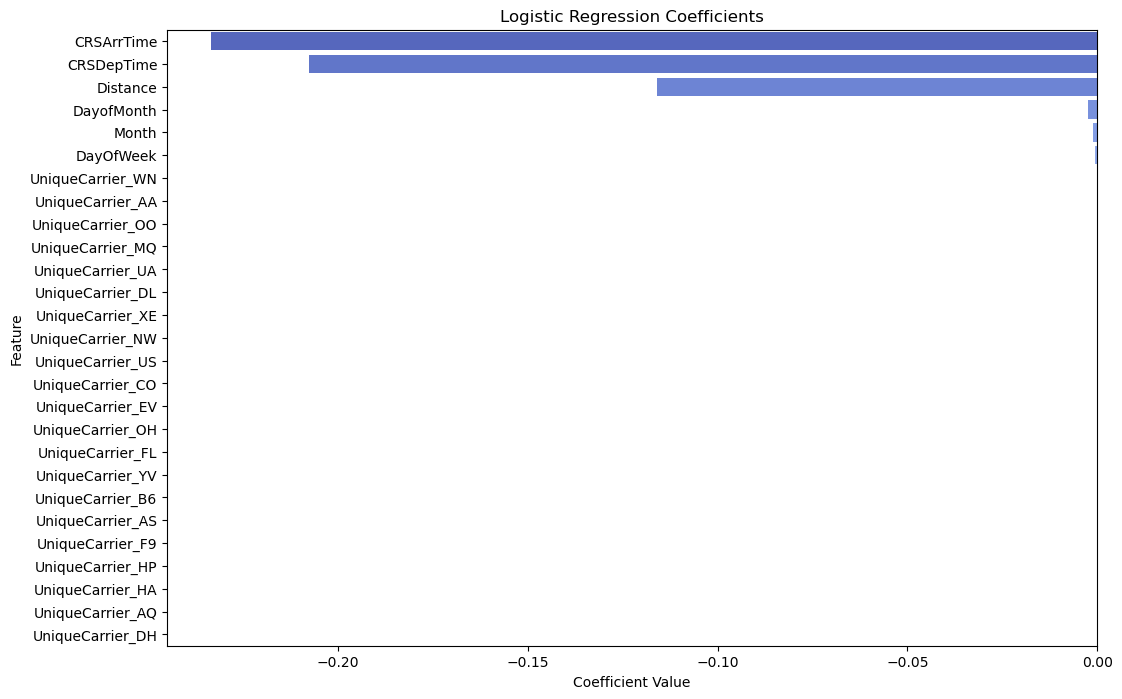

In [21]:
#Plotting coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.show()